# <center> Оценка связи спроса на товары в группе


In [155]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import json

## Загрузка и обработка данных

In [156]:
data = pd.read_excel("q011.xlsx")

In [157]:
data.head()

,Код склада,Название склада,Дата,Код гр.,Название гр.,Код товара,1 наименование,2 наименование,кол-во,Сумма в пр.ценах,Сумма в ср. зак,Сумма в баз. Ценах,Стоимость одной штуки
0,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23332850,Паста зубная Splat prof ультракомплекс 1,Паста зубная Splat prof ультракомплекс 100мл,1,154.0,109.51,159.0,159.0
1,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23595712,Щетка зубная Splat COMPLETE Soft для Ком,Щетка зубная Splat COMPLETE Soft для Комплексн...,1,174.0,116.21,179.0,179.0
2,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23668331,Паста зубная BLEND-A-MED ProExpert Все в,Паста зубная BLEND-A-MED ProExpert Все в одном...,1,169.0,114.72,169.0,169.0
3,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23782174,Прокладки гигиенические NATURELLA Camomi,Прокладки гигиенические NATURELLA Camomile Nor...,1,180.0,134.91,189.0,189.0
4,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23830790,Средство для мытья посуды 'Help' Бальзам,Средство для мытья посуды 'Help' Бальзам Лимон...,1,74.0,46.67,75.0,75.0


### Переименование названий стоблцов

Будем иcпользовать имена из латинского алфавита, записанные в <b> snake_case</b>.

In [158]:
data.columns

Index(['Код склада', 'Название склада', 'Дата', 'Код гр.', 'Название гр.',
       'Код товара', '1 наименование', '2 наименование', 'кол-во',
       'Сумма в пр.ценах', 'Сумма в ср. зак', 'Сумма в баз. Ценах',
       'Стоимость одной штуки'],
      dtype='object')

In [159]:
new_columns = ['depo_code', 'depo_name', 'date', 'group_code', 'group_name', 'code', 'name_1', 'name_2', 'quantity', 'income', 'profit_1', 'profit_2', 'price']

In [160]:
new_columns_dict = dict(list(zip(data.columns, new_columns)))
new_columns_dict

{'Код склада': 'depo_code',
 'Название склада': 'depo_name',
 'Дата': 'date',
 'Код гр.': 'group_code',
 'Название гр.': 'group_name',
 'Код товара': 'code',
 '1 наименование': 'name_1',
 '2 наименование': 'name_2',
 'кол-во': 'quantity',
 'Сумма в пр.ценах': 'income',
 'Сумма в ср. зак': 'profit_1',
 'Сумма в баз. Ценах': 'profit_2',
 'Стоимость одной штуки': 'price'}

In [161]:
data.columns = new_columns

In [162]:
data.head(2)

,depo_code,depo_name,date,group_code,group_name,code,name_1,name_2,quantity,income,profit_1,profit_2,price
0,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23332850,Паста зубная Splat prof ультракомплекс 1,Паста зубная Splat prof ультракомплекс 100мл,1,154.0,109.51,159.0,159.0
1,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23595712,Щетка зубная Splat COMPLETE Soft для Ком,Щетка зубная Splat COMPLETE Soft для Комплексн...,1,174.0,116.21,179.0,179.0


## Группировка данных о товарах

In [163]:
data.group_code.unique() # одна группа

array(['Q01'], dtype=object)

In [164]:
data.code.unique().shape # 1886 уникальных товаров в группе

(1870,)

Воспользуемся вспомогательной функцией, описание в файле <b> Week-Month-Series</b>.

In [165]:
def addYearWeekDay(df, timestamp = ['year', 'week']): 
    try:
        if 'year' in timestamp:
            df['year'] = list(list(map(lambda x: x.year, df.date)))
        if 'week' in timestamp:
            df['week'] = list(list(map(lambda x: x.week, df.date)))
        if 'day' in timestamp:
            df['day'] = list(list(map(lambda x: x.day, df.date)))
        if 'month' in timestamp:
            df['month'] = list(list(map(lambda x: x.month, df.date)))
    except:
        print('Expected date column in df')
    return df
# Эта функция вытаскивает из даты год, неделю или день

In [166]:
data1=addYearWeekDay(data, timestamp = ['year', 'month'])

In [167]:
data1.head()

,depo_code,depo_name,date,group_code,group_name,code,name_1,name_2,quantity,income,profit_1,profit_2,price,year,month
0,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23332850,Паста зубная Splat prof ультракомплекс 1,Паста зубная Splat prof ультракомплекс 100мл,1,154.0,109.51,159.0,159.0,2017,8
1,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23595712,Щетка зубная Splat COMPLETE Soft для Ком,Щетка зубная Splat COMPLETE Soft для Комплексн...,1,174.0,116.21,179.0,179.0,2017,8
2,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23668331,Паста зубная BLEND-A-MED ProExpert Все в,Паста зубная BLEND-A-MED ProExpert Все в одном...,1,169.0,114.72,169.0,169.0,2017,8
3,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23782174,Прокладки гигиенические NATURELLA Camomi,Прокладки гигиенические NATURELLA Camomile Nor...,1,180.0,134.91,189.0,189.0,2017,8
4,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23830790,Средство для мытья посуды 'Help' Бальзам,Средство для мытья посуды 'Help' Бальзам Лимон...,1,74.0,46.67,75.0,75.0,2017,8


In [168]:
print(data.columns.tolist())

['depo_code', 'depo_name', 'date', 'group_code', 'group_name', 'code', 'name_1', 'name_2', 'quantity', 'income', 'profit_1', 'profit_2', 'price', 'year', 'month']


In [169]:
sorted(data1[data1['code'] == 23591929][['quantity', 'year', 'month']].groupby(['year', 'month']).sum().index)

[(2017, 8),
 (2017, 9),
 (2017, 10),
 (2017, 11),
 (2017, 12),
 (2018, 1),
 (2018, 2),
 (2018, 3),
 (2018, 4),
 (2018, 5),
 (2018, 6),
 (2018, 7),
 (2018, 8),
 (2018, 9),
 (2018, 10),
 (2018, 11),
 (2018, 12),
 (2019, 1),
 (2019, 2),
 (2019, 3),
 (2019, 4),
 (2019, 5),
 (2019, 6),
 (2019, 7),
 (2019, 8),
 (2019, 9),
 (2019, 10),
 (2019, 11),
 (2019, 12),
 (2020, 1),
 (2020, 2),
 (2020, 3),
 (2020, 4),
 (2020, 5),
 (2020, 6),
 (2020, 7),
 (2020, 8)]

Если группировать данные по неделям, получаем много пропусков в данных. Для оценки взаимосвязи будем использовать группировку <b>по месяцам</b>.

In [170]:
data1[['code', 'year', 'month', 'quantity']].groupby(['code', 'year', 'month']).sum().values.reshape(1, -1)[0]

array([26, 24, 15, ...,  4, 21, 10], dtype=int64)

In [187]:
corr_data = []
corr_codes = []
wrong_codes = []
for code in list(data1.code.unique()):
    data_code = data1[data1['code'] == code][['year', 'month', 'quantity']].groupby(['year', 'month']).sum().values.reshape(1, -1)[0]
#     print(data_code.shape)
    if data_code.shape[0] == 24:
        corr_data.append(data_code)
        corr_codes.append(code)
    else:
        wrong_codes.append(code)
#         print(f'Not enougth data code {code}')

## Оценка корреляции между спросом на товары в группе

In [188]:
corr_data = np.array(corr_data)
corr_data

array([[ 18,  10,   9,  11,   4,   3,   3,   2,   6,  10,  10,   7,   5,
          4,   3,   1,   1,   3,   2,   1,   3,   3,   3,   2],
       [ 14,  13,  21,   7,   9,  13,   9,  16,  21,  16,  27,  13,   5,
          3,   5,   5,   1,   1,   1,   1,   1,   2,   1,   1],
       [ 64,  43,  39,  38,  21,  27,  19,  24, 103,  43,  65,  26,  22,
          4,   5,   2,   4,   3,   1,   8,   1,   8,   5,   2],
       [ 42,  44,  37,  24,  21,  24,  14,  25,  22,  36,  31,  30,  30,
         21,  22,  12,   1,   1,   1,   5,   4,   1,   1,   1],
       [ 11,   8,  23,  16,   9,  12,   8,  10,  11,  24,  14,  20,  15,
         16,  16,   9,   9,  13,   9,   6,  12,  17,   2,   3],
       [ 24,  16,   4,  11,   7,  14,  11,   8,   9,  16,  13,  11,   8,
          3,   3,   3,   7,   4,   5,   2,   3,   2,   1,   3],
       [ 16,  21,  21,  16,  31,  18,  12,  13,  26,  24,  29,  19,  22,
         14,   9,  13,  12,   6,   4,   5,   8,   1,   1,   1],
       [ 24,  41,  32,  44,  29,  24,  26

In [189]:
corr_data.shape

(32, 24)

Полные данные получены для 259 кодовых названий из 1886. Посчитаем корреляционную матрицу.

In [190]:
corr_matrix = np.corrcoef(corr_data)
corr_matrix

array([[1.        , 0.5953742 , 0.69732624, ..., 0.67139033, 0.67261863,
        0.41982456],
       [0.5953742 , 1.        , 0.83928035, ..., 0.65945266, 0.56509839,
        0.48552049],
       [0.69732624, 0.83928035, 1.        , ..., 0.66252889, 0.6029461 ,
        0.44653669],
       ...,
       [0.67139033, 0.65945266, 0.66252889, ..., 1.        , 0.67867526,
        0.16692548],
       [0.67261863, 0.56509839, 0.6029461 , ..., 0.67867526, 1.        ,
        0.28466271],
       [0.41982456, 0.48552049, 0.44653669, ..., 0.16692548, 0.28466271,
        1.        ]])

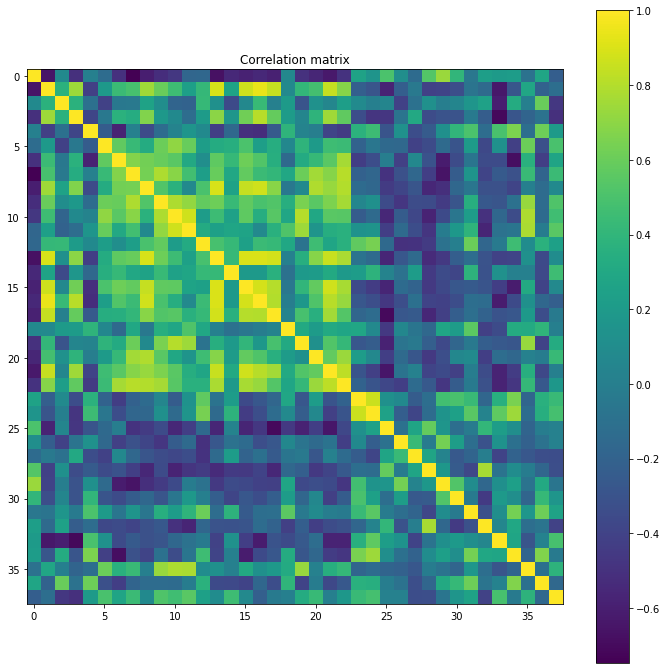

In [180]:
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix)
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

Оценим влияние этой корреляции с помощью гистограммы.

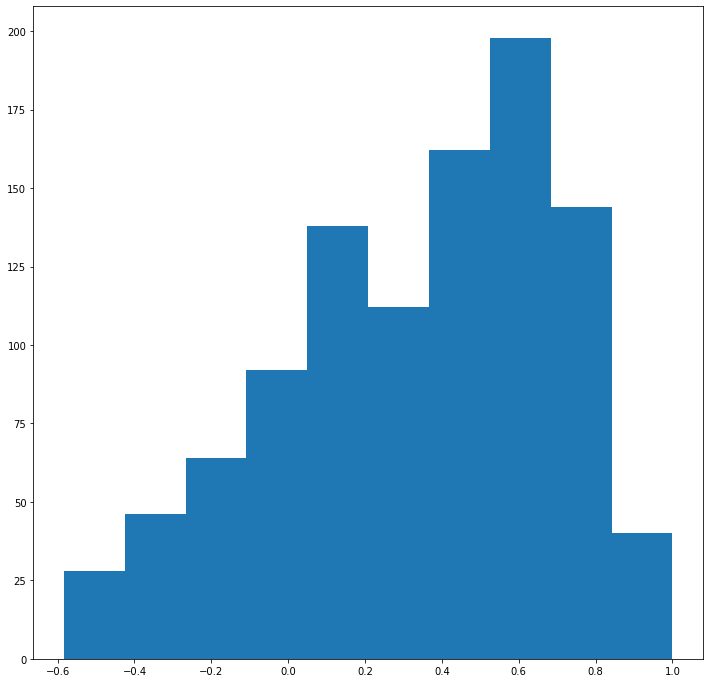

In [192]:
plt.figure(figsize=(12, 12))
plt.hist(corr_matrix.flatten())
plt.show()

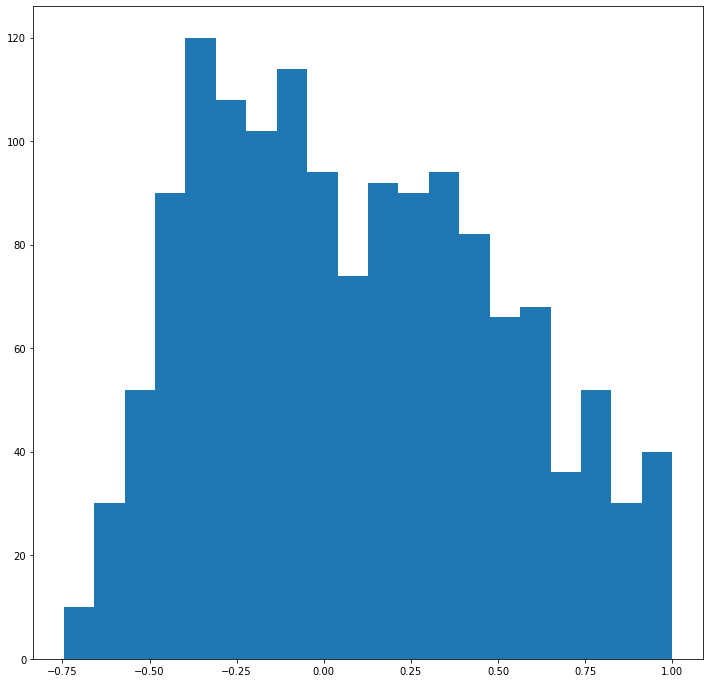

In [182]:
plt.figure(figsize=(12, 12))
plt.hist(corr_matrix.flatten(), bins = 20)
plt.show()

Результаты говорят о сильной положительной связи между спросом на различные товары в группе. 

## Вывод

### Увеличение спроса на один товар в группе влечёт увеличение спроса на остальные. Отсутсвие отрицательной связи позволяет нам максимизировать спрос на каждый товар в группе независимо от остальных.

## Товары с наибольшей корреляцией

In [193]:
correlated_pairs = []
n = corr_matrix.shape[0]
for i in range(n):
    for j in range(i + 1, n):
        if corr_matrix[i, j] >= 0.8:
            correlated_pairs.append((corr_codes[i], corr_codes[j]))

In [194]:
correlated_pairs

[(23558304, 24929929),
 (23863262, 23739673),
 (23863262, 23553194),
 (23863262, 23668133),
 (23794511, 23008489),
 (23739666, 23739673),
 (24973526, 23593015),
 (24973526, 23668133),
 (24973526, 23964266),
 (23739673, 23553194),
 (23739673, 26000244),
 (23553194, 26000244),
 (23593015, 23668133),
 (26000251, 26000268),
 (26000244, 23668126),
 (23008489, 24361309),
 (23668133, 23640429),
 (23668133, 23964266),
 (23668133, 24361309)]

In [195]:
corr_named_pairs = []
for pair in correlated_pairs:
    corr_named_pairs.append((data[data['code']== pair[0]].name_1.values[0], data[data['code']== pair[1]].name_1.values[0]))

In [196]:
corr_named_pairs

[('Скраб д/тела Банька Агафьи мыльно-березо',
  'Порошок стиральный Миф-автомат Свежесть'),
 ('Станки одноразовые Super-Max Twin Blade',
  'Средство чистящее Мистер КРЯК для унитаз'),
 ('Станки одноразовые Super-Max Twin Blade',
  'Бальзам BEAUTY FARM на козьем молоке для'),
 ('Станки одноразовые Super-Max Twin Blade',
  'Масло Репейное с кастор. маслом и витами'),
 ('Прокладки гигиенические NATURELLA Ultra', 'Шампунь Villa облепиха 1000мл'),
 ('Средство чистящее Мистер КРЯК для унитаз',
  'Средство чистящее Мистер КРЯК для унитаз'),
 ('Средство для чистки ванной и кафеля 750м',
  'Средство для чистки гриля и духовых шкаф'),
 ('Средство для чистки ванной и кафеля 750м',
  'Масло Репейное с кастор. маслом и витами'),
 ('Средство для чистки ванной и кафеля 750м',
  'Освежитель воздуха  Econel Свежесть зеле'),
 ('Средство чистящее Мистер КРЯК для унитаз',
  'Бальзам BEAUTY FARM на козьем молоке для'),
 ('Средство чистящее Мистер КРЯК для унитаз',
  'Освежитель воздуха KOOL AQUA Лесная яго

# Попробуем с неделями

In [214]:
data2=addYearWeekDay(data, timestamp = ['year', 'month', 'week'])

In [215]:
data2.head()

,depo_code,depo_name,date,group_code,group_name,code,name_1,name_2,quantity,income,profit_1,profit_2,price,year,month,week
0,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23332850,Паста зубная Splat prof ультракомплекс 1,Паста зубная Splat prof ультракомплекс 100мл,1,154.0,109.51,159.0,159.0,2017,8,32
1,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23595712,Щетка зубная Splat COMPLETE Soft для Ком,Щетка зубная Splat COMPLETE Soft для Комплексн...,1,174.0,116.21,179.0,179.0,2017,8,32
2,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23668331,Паста зубная BLEND-A-MED ProExpert Все в,Паста зубная BLEND-A-MED ProExpert Все в одном...,1,169.0,114.72,169.0,169.0,2017,8,32
3,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23782174,Прокладки гигиенические NATURELLA Camomi,Прокладки гигиенические NATURELLA Camomile Nor...,1,180.0,134.91,189.0,189.0,2017,8,32
4,E,Б Грузино хоз,2017-08-10,Q01,Бытовая химия,23830790,Средство для мытья посуды 'Help' Бальзам,Средство для мытья посуды 'Help' Бальзам Лимон...,1,74.0,46.67,75.0,75.0,2017,8,32


In [216]:
sorted(data1[data1['code'] == 23591929][['quantity', 'year', 'month', 'week']].groupby(['year', 'month', 'week']).sum().index)

[(2017, 8, 32),
 (2017, 8, 33),
 (2017, 8, 34),
 (2017, 8, 35),
 (2017, 9, 35),
 (2017, 9, 36),
 (2017, 9, 37),
 (2017, 9, 38),
 (2017, 9, 39),
 (2017, 10, 39),
 (2017, 10, 40),
 (2017, 10, 41),
 (2017, 10, 42),
 (2017, 10, 43),
 (2017, 10, 44),
 (2017, 11, 44),
 (2017, 11, 45),
 (2017, 11, 46),
 (2017, 11, 47),
 (2017, 11, 48),
 (2017, 12, 48),
 (2017, 12, 49),
 (2017, 12, 50),
 (2017, 12, 51),
 (2017, 12, 52),
 (2018, 1, 1),
 (2018, 1, 2),
 (2018, 1, 3),
 (2018, 1, 4),
 (2018, 1, 5),
 (2018, 2, 5),
 (2018, 2, 6),
 (2018, 2, 7),
 (2018, 2, 8),
 (2018, 2, 9),
 (2018, 3, 9),
 (2018, 3, 10),
 (2018, 3, 11),
 (2018, 3, 12),
 (2018, 3, 13),
 (2018, 4, 13),
 (2018, 4, 14),
 (2018, 4, 15),
 (2018, 4, 16),
 (2018, 4, 17),
 (2018, 4, 18),
 (2018, 5, 18),
 (2018, 5, 19),
 (2018, 5, 20),
 (2018, 5, 21),
 (2018, 5, 22),
 (2018, 6, 22),
 (2018, 6, 23),
 (2018, 6, 24),
 (2018, 6, 25),
 (2018, 6, 26),
 (2018, 7, 26),
 (2018, 7, 27),
 (2018, 7, 28),
 (2018, 7, 29),
 (2018, 7, 30),
 (2018, 7, 31),
 (2

In [217]:
data2[['code', 'year', 'month', 'week', 'quantity']].groupby(['code', 'year', 'month', 'week']).sum().values.reshape(1, -1)[0]

array([ 5, 12,  6, ...,  5,  5,  5], dtype=int64)

In [218]:
corr_data = []
corr_codes = []
wrong_codes = []
for code in list(data1.code.unique()):
    data_code = data1[data1['code'] == code][['year', 'month', 'week', 'quantity']].groupby(['year', 'month', 'week']).sum().values.reshape(1, -1)[0]
#     print(data_code.shape)
    if data_code.shape[0] == 104:
        corr_data.append(data_code)
        corr_codes.append(code)
    else:
        wrong_codes.append(code)
#         print(f'Not enougth data code {code}')

In [219]:
corr_data = np.array(corr_data)
corr_data

array([[ 2,  5,  2,  1,  7,  2,  2,  3,  3,  2,  2,  2,  2,  1,  3,  1,
         2,  1,  1,  1,  1,  1,  2,  2,  1,  1,  3,  5,  5,  6,  4,  3,
         5,  4,  5,  3,  3,  2,  5,  6,  4,  3,  5,  3,  4,  4,  1,  2,
         1,  6,  2,  1,  1,  2,  1,  1,  1,  3,  2,  2,  2,  4,  2,  1,
         3,  2,  2,  1,  5,  1,  1,  4,  3,  2,  1,  1,  1,  4,  7,  1,
         3,  4,  1,  1,  1,  2,  1,  4,  1,  2,  1,  4,  1,  1,  2,  2,
         2,  1,  1,  2,  1,  1,  1,  1],
       [ 2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  3,  2,
         4,  2,  2,  2,  1,  3,  2,  2,  3,  2,  1,  1,  1,  2,  1,  2,
         1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  3,  2,  3,  4,
         5,  3,  4,  3,  1,  3,  4,  6,  1,  4,  2,  2,  2,  1,  3,  1,
         4,  1,  2,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,
         1,  2,  6,  4,  5,  2,  3,  4, 16, 13, 16,  9, 15, 16, 14,  7,
         4,  6, 16, 14,  2,  5,  6, 12],
       [ 2,  4,  6,  3,  1,  3,  3,  5,  3,  1,  2,  3

In [221]:
corr_data.shape

(8, 104)

In [222]:
corr_matrix = np.corrcoef(corr_data)
corr_matrix

array([[ 1.        , -0.29757593, -0.09259499,  0.25383198,  0.14369923,
         0.06606339, -0.04089527,  0.24255289],
       [-0.29757593,  1.        ,  0.06761256, -0.28990769, -0.34734296,
         0.28948835, -0.25400024, -0.20936843],
       [-0.09259499,  0.06761256,  1.        ,  0.27809299,  0.25354373,
        -0.09874194, -0.05230162,  0.15737373],
       [ 0.25383198, -0.28990769,  0.27809299,  1.        ,  0.70054371,
         0.14974168,  0.02063317,  0.29648449],
       [ 0.14369923, -0.34734296,  0.25354373,  0.70054371,  1.        ,
         0.02171552,  0.10281671,  0.35407447],
       [ 0.06606339,  0.28948835, -0.09874194,  0.14974168,  0.02171552,
         1.        , -0.08197027,  0.0857508 ],
       [-0.04089527, -0.25400024, -0.05230162,  0.02063317,  0.10281671,
        -0.08197027,  1.        ,  0.0957145 ],
       [ 0.24255289, -0.20936843,  0.15737373,  0.29648449,  0.35407447,
         0.0857508 ,  0.0957145 ,  1.        ]])

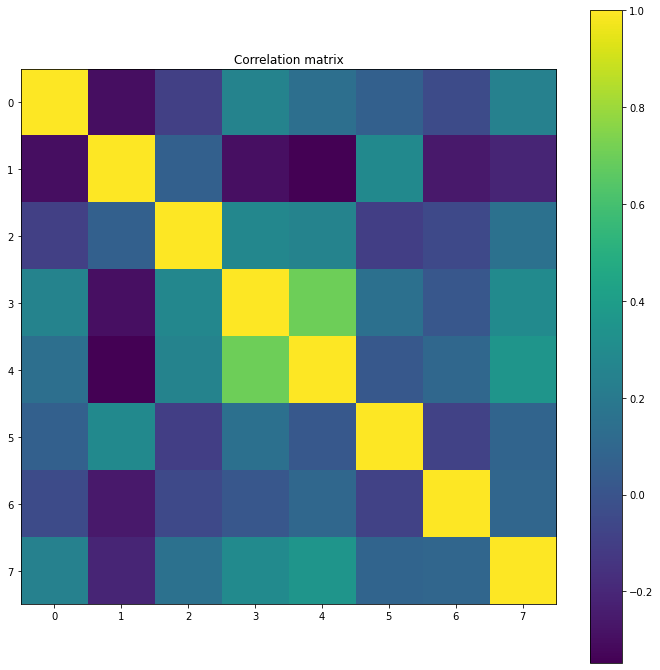

In [223]:
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix)
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

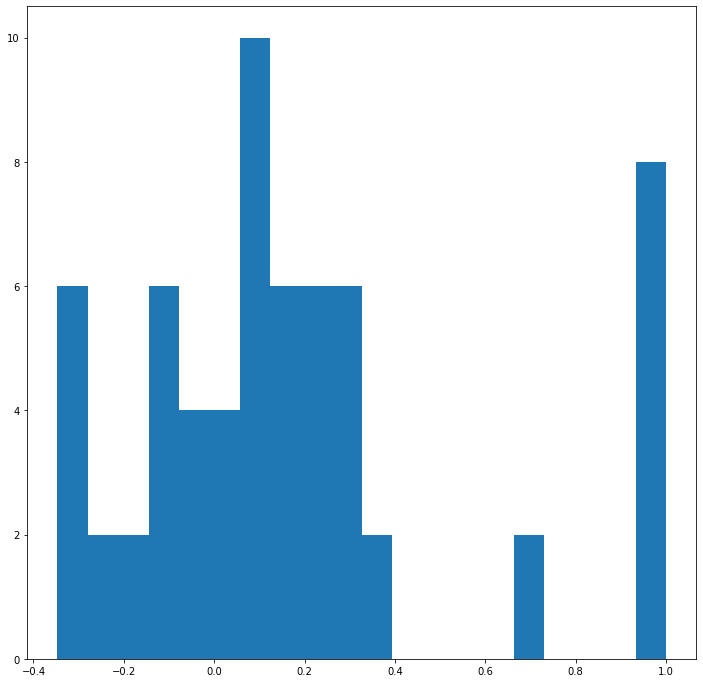

In [224]:
plt.figure(figsize=(12, 12))
plt.hist(corr_matrix.flatten(), bins = 20)
plt.show()

In [231]:
correlated_pairs = []
n = corr_matrix.shape[0]
for i in range(n):
    for j in range(i + 1, n):
        if corr_matrix[i, j] >= 0.2:
            correlated_pairs.append((corr_codes[i], corr_codes[j]))

In [235]:
corr_named_pairs = []
for pair in correlated_pairs:
    corr_named_pairs.append((data[data['code']== pair[0]].name_1.values[0], data[data['code']== pair[1]].name_1.values[0]))
for x in corr_named_pairs: print(x)

('Паста зубная детская JUICY ПЕРСИК 35мл', 'Освежитель воздуха KOOL AQUA Морской бри')
('Паста зубная детская JUICY ПЕРСИК 35мл', 'Шампунь Head & Sholders 2в1 освежающий м')
('Мыло жидкое HELP МОЛОКО И МЕД 300мл', 'Щетка зубная Народная арт.908')
('Паста зубная Blend-a-Мed ProExpert Все', 'Освежитель воздуха KOOL AQUA Морской бри')
('Паста зубная Blend-a-Мed ProExpert Все', 'Освежитель воздуха KOOL AQUA Лесная ягод')
('Освежитель воздуха KOOL AQUA Морской бри', 'Освежитель воздуха KOOL AQUA Лесная ягод')
('Освежитель воздуха KOOL AQUA Морской бри', 'Шампунь Head & Sholders 2в1 освежающий м')
('Освежитель воздуха KOOL AQUA Лесная ягод', 'Шампунь Head & Sholders 2в1 освежающий м')
